# Tarea

Dentro de esta carpeta se encuentra un directorio llamado "escuelas_privadas.geojson". Tendras que realizar la lectura, graficas y analisis de alguna de las alcalidas.

In [36]:
import pandas as pd
import geopandas as gpd
import numpy as np
import os 
from shapely.geometry import Point, MultiPoint
import matplotlib.pyplot as plt

Paso 1. Guarda el geojson en un dataframe e imprimelo. 

In [3]:
df = gpd.read_file("escuelas_privadas.geojson")
print(df)

                                                nombre  \
0                                CENDI PART SEDI LOMAS   
1                                     ARMONIA INFANTIL   
2                  CENDI PART. COLEGIO DE LAS BALEARES   
3                     CENDI PART COLEGIO CIBELES, S.C.   
4           CENTRO DE DESARROLLO INFANTIL KINDERGARDEN   
...                                                ...   
3654                                  ARMONIA INFANTIL   
3655                         CENDI PART MI MUNDO FELIZ   
3656                    CENDI PART COLEGIO BILBAO S.C.   
3657  CENDI PART ECOLOGICO DE DESARROLLO INFANTIL S.C.   
3658                               MUNDO DE LOS PEQUES   

                       nivel            turno     sstnmnt  \
0                    INICIAL         MATUTINO  Particular   
1                    INICIAL         MATUTINO  Particular   
2                    INICIAL  TIEMPO COMPLETO  Particular   
3                    INICIAL         MATUTINO  Particular  

<Axes: >

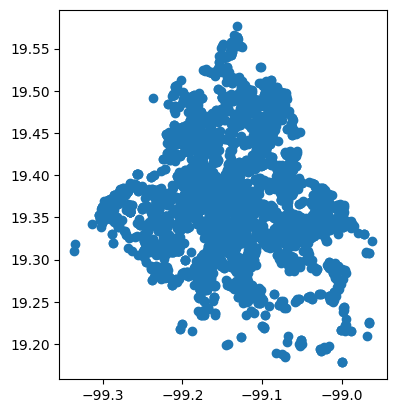

In [38]:
df.plot()

Paso 2. Crea otro gdf con solo las escuelas en la delegacion Miguel Hidalgo

In [5]:
df_mh = df[df['alcaldi'] == 'MIGUEL HIDALGO']
print(df_mh)

                                                 nombre  \
0                                 CENDI PART SEDI LOMAS   
11                                  COLEGIO SAN AGUSTIN   
14                          ESTANCIA INFANTIL PRIMAVERA   
19    CENTRO DE DESARROLLO INFANTIL UNA SEMILLA DE L...   
33                                 PROINFANCIA TERESITA   
...                                                 ...   
3581  INSTITUTO MEXICANO DE EDUCACIÓN PRIMARIA Y SEC...   
3620                                  "HUMANITREE HIVE"   
3621               "SECUNDARIA IL MIO MONDO MONTESSORI"   
3644                              DR JAIME TORRES BODET   
3658                                MUNDO DE LOS PEQUES   

                       nivel            turno     sstnmnt  \
0                    INICIAL         MATUTINO  Particular   
11                   INICIAL  TIEMPO COMPLETO  Particular   
14                   INICIAL         MATUTINO  Particular   
19                   INICIAL  TIEMPO COMPLETO  

Paso 3. Setea el indice para que ahora sea la colonia

In [6]:
df_mh = df_mh.set_index('colonia')
print(df_mh)

                                                                      nombre  \
colonia                                                                        
LOMAS DE CHAPULTEPEC                                   CENDI PART SEDI LOMAS   
POLANCO REFORMA (POLANCO)                                COLEGIO SAN AGUSTIN   
ANAHUAC LOS MANZANOS                             ESTANCIA INFANTIL PRIMAVERA   
ANZURES                    CENTRO DE DESARROLLO INFANTIL UNA SEMILLA DE L...   
ANZURES                                                 PROINFANCIA TERESITA   
...                                                                      ...   
ANZURES                    INSTITUTO MEXICANO DE EDUCACIÓN PRIMARIA Y SEC...   
LOMAS DE CHAPULTEPEC                                       "HUMANITREE HIVE"   
ANAHUAC LOS MANZANOS                    "SECUNDARIA IL MIO MONDO MONTESSORI"   
REFORMA SOCIAL                                         DR JAIME TORRES BODET   
POLANCO REFORMA (POLANCO)               

Paso 3. Grafica el dataframe

<Axes: >

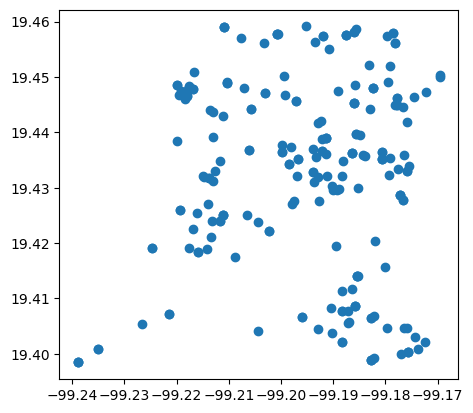

In [7]:
df_mh.plot()

Paso 4. Crea dos nuevas columnas en el gdf original que sean para el area y el perimetro, en ellas haz tu calculo de cada una.

In [8]:
df['area'] = df['geometry'].area
df['perimeter'] = df['geometry'].length
print(df)

                                                nombre  \
0                                CENDI PART SEDI LOMAS   
1                                     ARMONIA INFANTIL   
2                  CENDI PART. COLEGIO DE LAS BALEARES   
3                     CENDI PART COLEGIO CIBELES, S.C.   
4           CENTRO DE DESARROLLO INFANTIL KINDERGARDEN   
...                                                ...   
3654                                  ARMONIA INFANTIL   
3655                         CENDI PART MI MUNDO FELIZ   
3656                    CENDI PART COLEGIO BILBAO S.C.   
3657  CENDI PART ECOLOGICO DE DESARROLLO INFANTIL S.C.   
3658                               MUNDO DE LOS PEQUES   

                       nivel            turno     sstnmnt  \
0                    INICIAL         MATUTINO  Particular   
1                    INICIAL         MATUTINO  Particular   
2                    INICIAL  TIEMPO COMPLETO  Particular   
3                    INICIAL         MATUTINO  Particular  

/tmp/ipykernel_69/600477441.py:1: UserWarning: Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  df['area'] = df['geometry'].area
/tmp/ipykernel_69/600477441.py:2: UserWarning: Geometry is in a geographic CRS. Results from 'length' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  df['perimeter'] = df['geometry'].length


Paso 5. Crea una nueva columna en el gdf del paso 1 que se llame distancia; después escoge una escuela del data frame y que la nueva columna tenga la distancia de todas las escuelas a la que escogiste 

In [9]:
escuela = df.iloc[9]
df['distancia'] = df['geometry'].distance(escuela['geometry'])
print(df)

                                                nombre  \
0                                CENDI PART SEDI LOMAS   
1                                     ARMONIA INFANTIL   
2                  CENDI PART. COLEGIO DE LAS BALEARES   
3                     CENDI PART COLEGIO CIBELES, S.C.   
4           CENTRO DE DESARROLLO INFANTIL KINDERGARDEN   
...                                                ...   
3654                                  ARMONIA INFANTIL   
3655                         CENDI PART MI MUNDO FELIZ   
3656                    CENDI PART COLEGIO BILBAO S.C.   
3657  CENDI PART ECOLOGICO DE DESARROLLO INFANTIL S.C.   
3658                               MUNDO DE LOS PEQUES   

                       nivel            turno     sstnmnt  \
0                    INICIAL         MATUTINO  Particular   
1                    INICIAL         MATUTINO  Particular   
2                    INICIAL  TIEMPO COMPLETO  Particular   
3                    INICIAL         MATUTINO  Particular  

/tmp/ipykernel_69/1385409065.py:2: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  df['distancia'] = df['geometry'].distance(escuela['geometry'])


Paso 6. Realiza una consulta para saber cuales son las 3 escuelas mas lejos del punto que elegiste, debe imprimir solamente el nombre de las escuelas y su distancia al punto

In [11]:
df_aux = df.sort_values(by='distancia', ascending=False)
df_aux = df_aux.head(3)[['colonia', 'distancia']]
print (df_aux)

             colonia  distancia
1427         LA PILA   0.287855
300          LA PILA   0.285367
3059  LOMA DEL PADRE   0.260664


Paso 7. Agrupa las escuelas por su alcaldia. Una vez hecho eso crea una nueva geometria que "envuelva" a las escuelas de cada alcaldia y graficalos

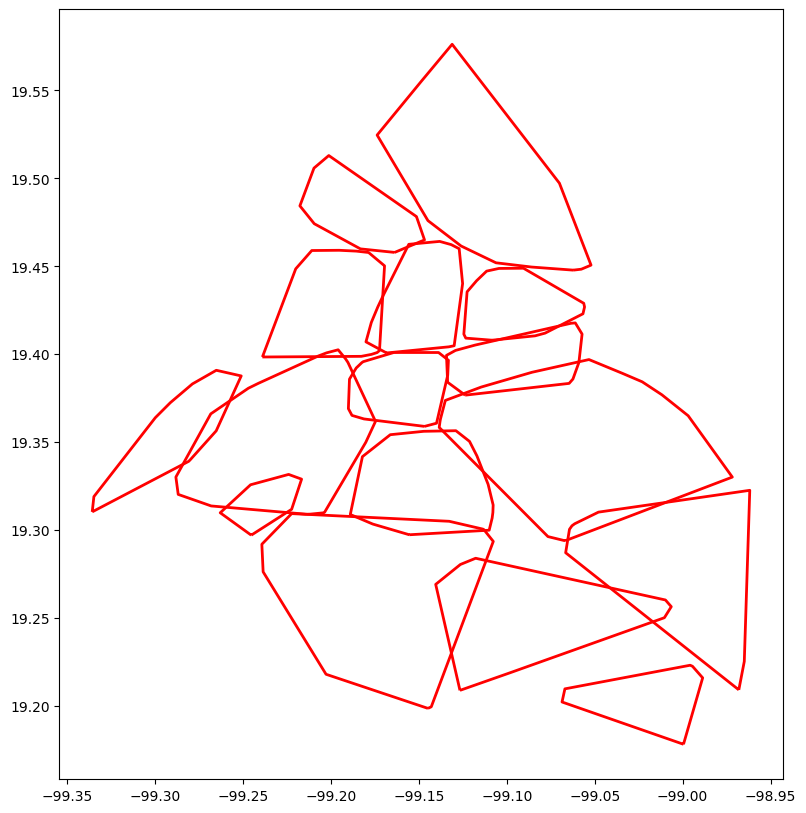

In [50]:
# Supongamos que tienes un GeoDataFrame llamado 'gdf_escuelas' con información sobre las escuelas
# y una columna 'alcaldia' que indica la alcaldía a la que pertenece cada escuela.

# 1. Agrupar el DataFrame por 'alcaldia'
gdf_grupo = df.groupby('alcaldi')

# 2. Para cada grupo, encontrar la geometría que envuelve todas las escuelas
geometrias_por_alcaldia = []

for alcaldia, grupo in gdf_grupo:
    # Obtener la geometría que envuelve todas las escuelas en esta alcaldía
    geometria_alcaldia = MultiPoint(grupo['geometry'].tolist()).convex_hull
    
    # Guardar la geometría junto con el nombre de la alcaldía
    geometrias_por_alcaldia.append({'alcaldia': alcaldia, 'geometry': geometria_alcaldia})

# 3. Crear un nuevo GeoDataFrame con las geometrías por alcaldía
gdf_envolventes = gpd.GeoDataFrame(geometrias_por_alcaldia)

# 4. Plotear únicamente la envoltura
ax = gdf_envolventes.plot(edgecolor='red', facecolor='none', linewidth=2, figsize=(10, 10))


El paso anterior guardalo como una capa y graficalo en conjunto a la grafica del paso 1

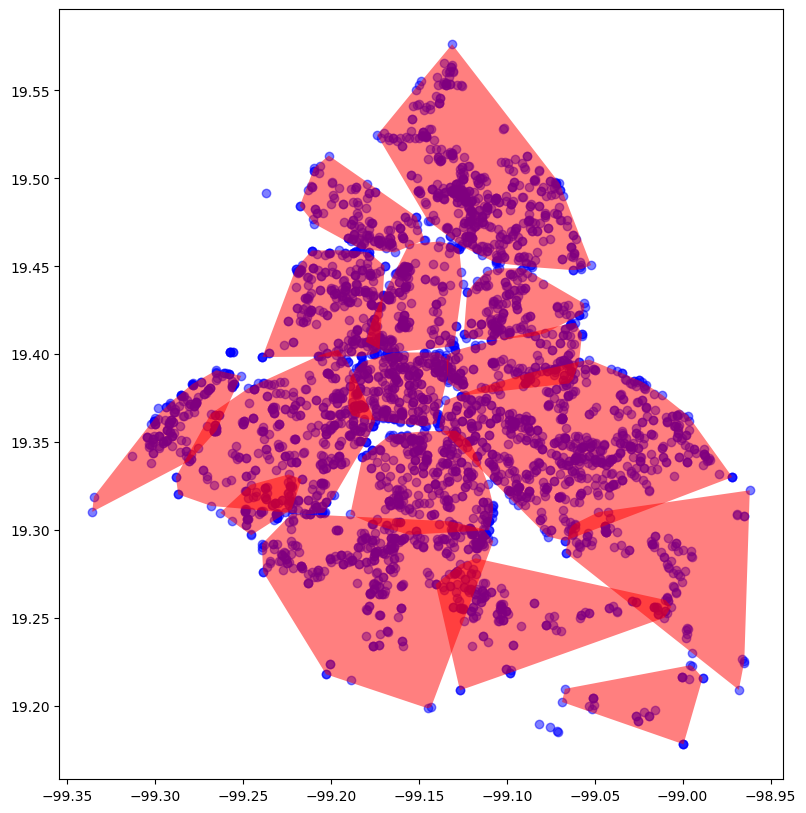

In [55]:
# Guardar el plot como una capa (por ejemplo, un shapefile)
output_file = "capa.shp"
gdf_envolventes.to_file(output_file)
plt.savefig("plot.png", dpi=300)  # Guardar también una imagen del plot

# Cerrar el plot actual para evitar superposiciones en el próximo plot
plt.close()

# Cargar la capa guardada como un nuevo GeoDataFrame
gdf_capa_guardada = gpd.read_file(output_file)

# Plotear el DataFrame original y la capa guardada juntos
ax = df.plot(figsize=(10, 10), color='blue', alpha=0.5)
gdf_capa_guardada.plot(ax=ax, color='red', alpha=0.5)

# Mostrar el plot
plt.show()

Paso 8. Crea una nueva columna en el gdf inicial llamada 'Calidad_escuela' que imprima un numero aleatorio entre 1 y 10. 
Imprime el gdf


In [57]:
df['Calidad_escuela'] = np.random.randint(1, 11, size=len(df))
print(df)

                                                nombre  \
0                                CENDI PART SEDI LOMAS   
1                                     ARMONIA INFANTIL   
2                  CENDI PART. COLEGIO DE LAS BALEARES   
3                     CENDI PART COLEGIO CIBELES, S.C.   
4           CENTRO DE DESARROLLO INFANTIL KINDERGARDEN   
...                                                ...   
3654                                  ARMONIA INFANTIL   
3655                         CENDI PART MI MUNDO FELIZ   
3656                    CENDI PART COLEGIO BILBAO S.C.   
3657  CENDI PART ECOLOGICO DE DESARROLLO INFANTIL S.C.   
3658                               MUNDO DE LOS PEQUES   

                       nivel            turno     sstnmnt  \
0                    INICIAL         MATUTINO  Particular   
1                    INICIAL         MATUTINO  Particular   
2                    INICIAL  TIEMPO COMPLETO  Particular   
3                    INICIAL         MATUTINO  Particular  

Paso 9. Ahora, plotea el gdf, pero visualizando la columna 'Calidad escuela'

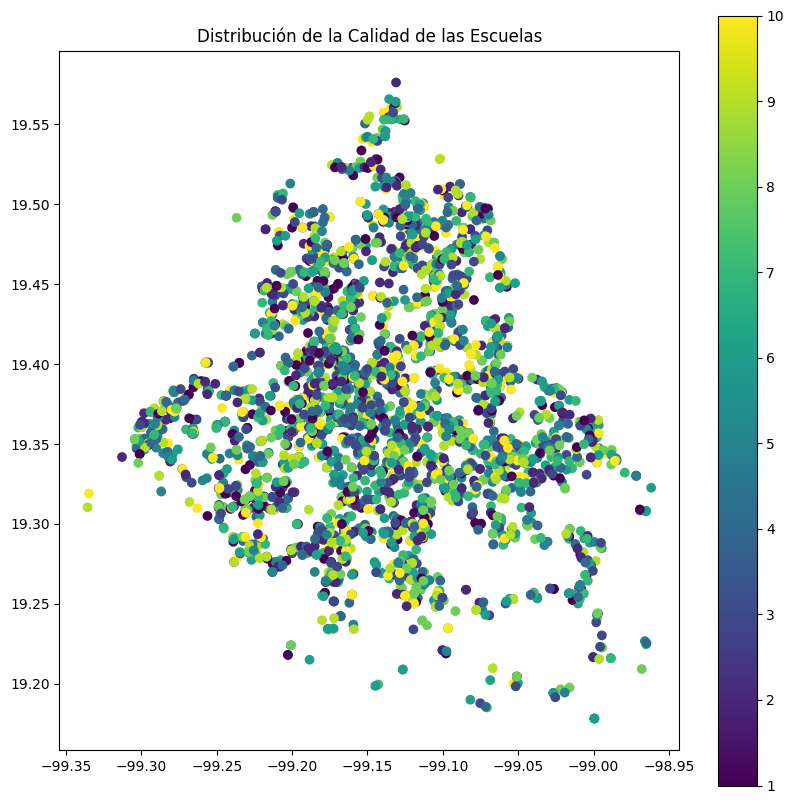

In [58]:
ax = df.plot(column='Calidad_escuela', cmap='viridis', legend=True, figsize=(10, 10))
plt.title('Distribución de la Calidad de las Escuelas')
plt.show()

Paso 10. Finalmente, plotea en escala de Rojos, en cuantiles de 4 categorias.
Recuerda que los colores deben de ser claros, inserta una leyenda

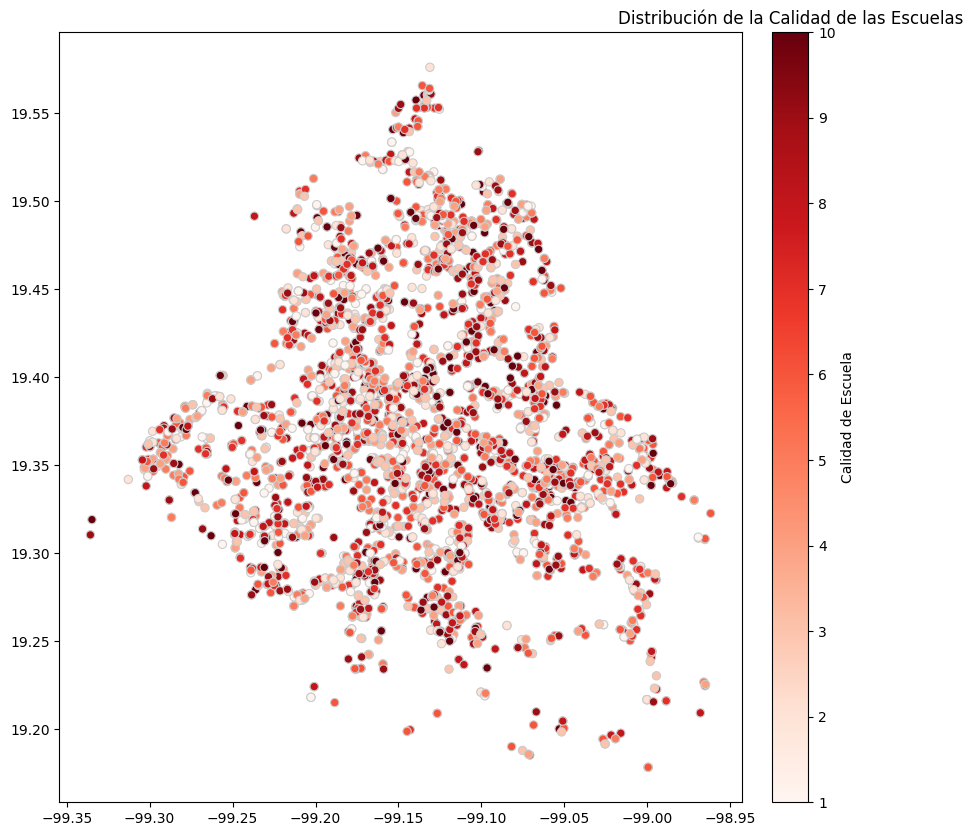

In [61]:
from mpl_toolkits.axes_grid1 import make_axes_locatable

# Crear cuantiles para la columna 'Calidad_escuela'
quantiles = df['Calidad_escuela'].quantile([0, 0.25, 0.5, 0.75, 1.0])

# Plotear el GeoDataFrame utilizando la columna 'Calidad_escuela' en escala de rojos
fig, ax = plt.subplots(1, 1, figsize=(10, 10))

divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.1)

df.plot(column='Calidad_escuela', cmap='Reds', linewidth=0.8, ax=ax, legend=True, edgecolor='0.8', legend_kwds={'label': "Calidad de Escuela", 'orientation': "vertical"}, cax=cax)

# Añadir título al plot
plt.title('Distribución de la Calidad de las Escuelas')

# Mostrar el plot
plt.show()